## NY Crime

In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
import statsmodels.formula.api as smf

In [13]:
crime = pd.read_csv('nycrime.csv')
crime.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0


In [14]:
column = pd.Series(crime.iloc[3]).values

In [15]:
crime = crime.drop(crime.index[[0,1,2,3,352,353,354]])
crime.columns = column
crime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [16]:
crime = crime.reset_index(drop=True)
feature = ['Population','Murder and\nnonnegligent\nmanslaughter','Robbery']
crime[feature].head()

,Population,Murder and nonnegligent manslaughter,Robbery
0,"1,861",0,0
1,"2,577",0,0
2,"2,846",0,0
3,"97,956",8,227
4,"6,388",0,4


## Feature Creation and Selection

In [78]:
features = pd.DataFrame()

In [79]:
#Violent Crime
features['Violent Crime'] = crime['Violent\ncrime'].str.replace(',','')
for i in range(len(crime['Violent\ncrime'])):
    features['Violent Crime'][i] = int(features['Violent Crime'][i])

In [80]:
features['Property Crime'] = crime['Property\ncrime'].str.replace(',','')
for i in range(len(crime['Property\ncrime'])):
    features['Property Crime'][i] = int(features['Property Crime'][i])

In [81]:
#Population
features['Population'] = crime['Population'].str.replace(',','')
for i in range(len(crime['Population'])):
    features['Population'][i] = int(features['Population'][i])

In [82]:
#Population squared
features['Pop Squared'] = features['Population']
for i in range(len(features['Population'])):
    features['Pop Squared'][i] = int(features['Pop Squared'][i])*int(features['Pop Squared'][i])

In [83]:
#Murder Total
features['Murder'] = crime['Murder and\nnonnegligent\nmanslaughter'].str.replace(',','')
for i in range(len(crime['Murder and\nnonnegligent\nmanslaughter'])):
    features['Murder'][i] = int(features['Murder'][i])

In [84]:
#Murder as a Categorical
features['Murder_Cat'] = crime['Murder and\nnonnegligent\nmanslaughter'].str.replace(',','')
for i in range(len(crime['Murder and\nnonnegligent\nmanslaughter'])):
    features['Murder_Cat'][i] = int(features['Murder_Cat'][i])
    if features['Murder_Cat'][i] == 0:
        features['Murder_Cat'][i] = 0
    else:
        features['Murder_Cat'][i] = 1

In [85]:
#Robbery Total
features['Robbery'] = crime['Robbery'].str.replace(',','')
for i in range(len(crime['Robbery'])):
    features['Robbery'][i] = int(features['Robbery'][i])

In [86]:
#Robbery as a Categorical
features['Robbery_Cat'] = crime['Robbery'].str.replace(',','')
for i in range(len(crime['Robbery'])):
    features['Robbery_Cat'][i] = int(features['Robbery_Cat'][i])
    if features['Robbery_Cat'][i] == 0:
        features['Robbery_Cat'][i] = 0
    else:
        features['Robbery_Cat'][i] = 1

In [87]:
features.head()

,Violent Crime,Property Crime,Population,Pop Squared,Murder,Murder_Cat,Robbery,Robbery_Cat
0,0,12,1861,3463321,0,0,0,0
1,3,24,2577,6640929,0,0,0,0
2,3,16,2846,8099716,0,0,0,0
3,791,4090,97956,9595377936,8,1,227,1
4,23,223,6388,40806544,0,0,4,1


In [88]:
regr = linear_model.LinearRegression()
target = features['Property Crime'].values.reshape(-1, 1)
data = features[['Population','Pop Squared','Murder','Murder_Cat','Robbery','Robbery_Cat']]
regr.fit(data, target)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(data, target))


Coefficients: 
 [[ 1.52130152e-02 -9.44818779e-10  1.22380130e+02 -6.46504116e+01
   2.07765121e+00  1.04837375e+02]]

Intercept: 
 [-21.14821481]

R-squared:
0.9987802654331784


In [89]:
y_pred = regr.predict(data)

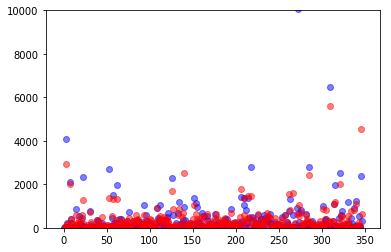

In [90]:
plt.scatter(y=target, x=range(len(target)), color='b', alpha=0.5)
plt.scatter(y=y_pred, x=range(len(target)), color='r', alpha=0.5)
plt.ylim(0,10000)
plt.show()